In [1]:
import pandas as pd
from helpers import load_config
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

config_path = os.path.join("configs", "configs.yaml")
config = load_config(config_path)

In [2]:
df = pd.read_csv(config["STORAGE_DIR_STUDY1"] + "pathological_df.csv")

In [3]:
df[["PFS_MONTHS", "PFS_STATUS"]]

,PFS_MONTHS,PFS_STATUS
0,7.101292,1:PROGRESSION
1,8.679357,1:PROGRESSION
2,13.216294,0:CENSORED
3,23.309334,0:CENSORED
4,21.369629,0:CENSORED
5,13.939573,1:PROGRESSION
6,13.808068,0:CENSORED
7,64.963672,0:CENSORED
8,35.407831,0:CENSORED
9,7.134168,1:PROGRESSION


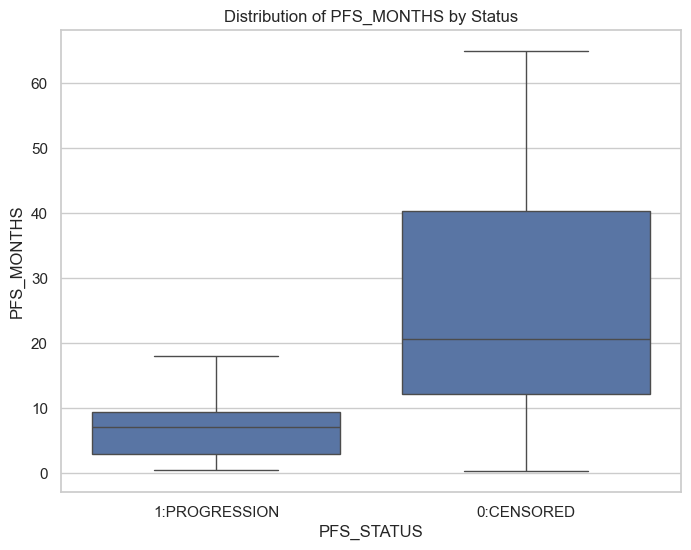

In [4]:
# Set style (optional)
sns.set_theme(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))  # Optional: specify the figure size
sns.boxplot(x='PFS_STATUS', y='PFS_MONTHS', data=df)

# Add labels and title
plt.xlabel('PFS_STATUS')
plt.ylabel('PFS_MONTHS')
plt.title('Distribution of PFS_MONTHS by Status')

# Show plot
plt.show()


In [5]:
df_recur = df[df["PFS_STATUS"] == "1:PROGRESSION"]
df_non_recur = df[df["PFS_STATUS"] == "0:CENSORED"]
print(f"Recurrence df: {df_recur.shape}, Non-recurrence df: {df_non_recur.shape}")

Recurrence df: (20, 23), Non-recurrence df: (16, 23)


In [6]:
print("Time of recurrence for recurred cancer(sorted):")
df_recur["PFS_MONTHS"].sort_values()
# df_recur["target"] = 1

Time of recurrence for recurred cancer(sorted):


27     0.558898
21     1.315054
29     1.610941
28     1.939705
35     2.367097
14     3.123253
24     5.588980
30     6.509518
10     7.068416
0      7.101292
9      7.134168
15     7.791695
32     7.956077
1      8.679357
31     9.238255
13     9.698524
22    11.901239
23    12.394385
5     13.939573
25    18.049117
Name: PFS_MONTHS, dtype: float64

In [7]:
print("Time of data collection for non-recurred cases(sorted):")
df_non_recur["PFS_MONTHS"].sort_values()


Time of data collection for non-recurred cases(sorted):


19     0.328764
26     0.690403
11     1.643818
16     8.909491
2     13.216294
6     13.808068
33    17.062827
34    19.791564
4     21.369629
3     23.309334
8     35.407831
18    37.906434
20    47.637834
12    50.695335
17    53.062432
7     64.963672
Name: PFS_MONTHS, dtype: float64

First 4 rows have a duration less than a year. So it is possible that cancer recurred after this data was collected. For example, for the first patient, cancer hasn't recurred in $0.328764$ months but could have recurred after a few months. <u>Hence filtering out first four rows</u>.

In [8]:
df_non_recur = df_non_recur[df_non_recur["PFS_MONTHS"] > 12]
df_non_recur["target"] = 0

In [9]:
df = pd.concat([df_recur, df_non_recur], axis=0)
df.head().T

,0,1,5,9,10
PATIENT_ID,TCGA-3X-AAV9,TCGA-3X-AAVA,TCGA-4G-AAZO,TCGA-W5-AA2I,TCGA-W5-AA2O
WEIGHT,52,92,67,125,73
PFS_STATUS,1:PROGRESSION,1:PROGRESSION,1:PROGRESSION,1:PROGRESSION,1:PROGRESSION
PFS_MONTHS,7.101292,8.679357,13.939573,7.134168,7.068416
SAMPLE_ID,TCGA-3X-AAV9-01,TCGA-3X-AAVA-01,TCGA-4G-AAZO-01,TCGA-W5-AA2I-01,TCGA-W5-AA2O-01
CANCER_TYPE,Cholangiocarcinoma,Cholangiocarcinoma,Cholangiocarcinoma,Cholangiocarcinoma,Cholangiocarcinoma
GRADE,2,2,2,2,3
ANEUPLOIDY_SCORE,10,5,9,6,12
MSI_SCORE_MANTIS,0.3138,0.3468,0.3473,0.3394,0.3436
MSI_SENSOR_SCORE,0.0,0.02,0.07,0.14,0.18


In [10]:
storage_dir = config["STORAGE_DIR_STUDY1"]
df.to_csv(storage_dir + "pathlogical_classification.csv", index=False)

# Modeling

In [11]:
df = pd.read_csv(storage_dir + "pathlogical_classification.csv")

In [12]:
columns_to_remove = ["PATIENT_ID", "PFS_STATUS", "PFS_MONTHS", "SAMPLE_ID", "CANCER_TYPE"]
df = df.drop(columns_to_remove, axis=1)

In [13]:
print(df["target"].value_counts())
print(f"Baseline accuracy: 20/(20+12) = {20/32*100:.2f}%")

target
1    20
0    12
Name: count, dtype: int64
Baseline accuracy: 20/(20+12) = 62.50%


In [14]:
X = df.drop(["target"], axis=1)
y = df["target"]

scaler = StandardScaler()
scaler.fit(X)

X_std = scaler.transform(X)

In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

def evaluate_classification_models(X, y):
    # Initialize classifiers
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }
    
    # Initialize results dictionary
    predictions = {}
    
    # Perform LeaveOneOut cross-validation for each classifier
    for name, clf in classifiers.items():

        loo = LeaveOneOut()
        all_y = []
        all_y_pred = []
        
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            all_y.append(*y_test)
            all_y_pred.append(*y_pred)

        accuracy = accuracy_score(all_y, all_y_pred)
        recall = recall_score(all_y, all_y_pred)
        predictions[name] = {
            "y": all_y, 
            "y_pred": all_y_pred, 
            "accuracy": accuracy,
            "recall": recall 
            }
        
        print(f"{name} - Accuracy: {accuracy*100:.2f}%, Recall: {recall*100:.4f}%")
        # Store results
        predictions[name] = {"Accuracy": accuracy, "Recall": recall}
    
    return predictions



In [16]:
predictions_path_only = evaluate_classification_models(X_std, y)

Logistic Regression - Accuracy: 68.75%, Recall: 80.0000%
Decision Tree - Accuracy: 68.75%, Recall: 80.0000%
Random Forest - Accuracy: 75.00%, Recall: 85.0000%
Support Vector Machine - Accuracy: 56.25%, Recall: 85.0000%
K-Nearest Neighbors - Accuracy: 56.25%, Recall: 75.0000%
Naive Bayes - Accuracy: 50.00%, Recall: 50.0000%


In [17]:
X_std = pd.DataFrame(data=X_std, columns=X.columns)

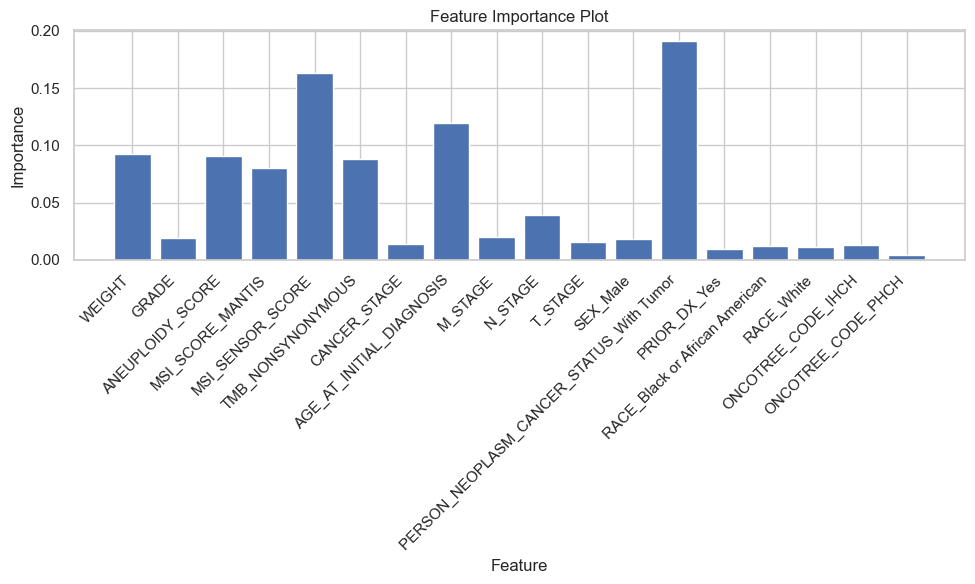

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have your data and labels ready
# X_train, y_train = ...

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_std, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X.columns  # Replace with actual feature names if available

# Create feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Combining mutations data for modeling

In [19]:
# renaming pathological dataframe for code reusablity
pathological_df = pd.read_csv(storage_dir + "pathlogical_classification.csv")

In [20]:
storage_dir = config["STORAGE_DIR_STUDY1"]
mutations_df = pd.read_csv(storage_dir+"mutations_summary.csv")

mutations_pcs = np.load(storage_dir+"mutations_pcs.npy")
mutations_emb_df = pd.DataFrame(mutations_pcs, columns=[f"MPC{i}" for i in range(1, 37)])

mutations_emb_df["SAMPLE_ID"] = mutations_df["Tumor_Sample_Barcode"]
mutations_emb_df.head()

,MPC1,MPC2,MPC3,MPC4,MPC5,MPC6,MPC7,MPC8,MPC9,MPC10,...,MPC28,MPC29,MPC30,MPC31,MPC32,MPC33,MPC34,MPC35,MPC36,SAMPLE_ID
0,-4.789946,0.983327,-0.638640,-0.754300,-5.626428,-1.668128,-0.973259,1.422773,3.702551,-0.176645,...,1.091584,-1.775238,2.672930,2.247378,3.042557,0.196324,-1.986215,-0.203015,-1.853332e-06,TCGA-3X-AAV9-01
1,0.882283,-4.788849,-4.031620,-7.057518,3.737478,-2.238158,0.269700,-3.129369,0.758464,-3.846380,...,-2.034311,1.149315,1.014117,-0.597349,1.207162,-0.477922,0.423363,0.049962,2.001878e-06,TCGA-3X-AAVA-01
2,-5.414783,3.500885,-0.595378,-0.710911,9.521237,0.324991,0.473151,6.232844,5.557762,-6.123328,...,1.911981,-0.222170,-0.082528,0.109054,-1.682603,-1.123866,-1.035573,0.164073,7.860363e-07,TCGA-3X-AAVB-01
3,-7.429733,11.925982,-8.390171,0.348783,0.322835,-5.155244,2.950831,-2.331049,2.045247,-4.110403,...,1.834453,-0.275619,-0.210881,1.657167,2.983931,-2.796740,2.746371,0.204423,-8.977950e-07,TCGA-3X-AAVC-01
4,-5.602586,2.367752,0.285232,11.230629,1.731591,-1.607319,-8.087043,-3.406104,5.083208,-1.616502,...,-1.621789,1.282351,-0.908896,0.953539,0.363270,-1.126020,0.432343,-0.151220,5.448237e-07,TCGA-3X-AAVE-01


In [21]:
df = pd.merge(pathological_df, mutations_emb_df, on="SAMPLE_ID", how="inner")

df.columns

Index(['PATIENT_ID', 'WEIGHT', 'PFS_STATUS', 'PFS_MONTHS', 'SAMPLE_ID',
       'CANCER_TYPE', 'GRADE', 'ANEUPLOIDY_SCORE', 'MSI_SCORE_MANTIS',
       'MSI_SENSOR_SCORE', 'TMB_NONSYNONYMOUS', 'CANCER_STAGE',
       'AGE_AT_INITIAL_DIAGNOSIS', 'M_STAGE', 'N_STAGE', 'T_STAGE', 'SEX_Male',
       'PERSON_NEOPLASM_CANCER_STATUS_With Tumor', 'PRIOR_DX_Yes',
       'RACE_Black or African American', 'RACE_White', 'ONCOTREE_CODE_IHCH',
       'ONCOTREE_CODE_PHCH', 'target', 'MPC1', 'MPC2', 'MPC3', 'MPC4', 'MPC5',
       'MPC6', 'MPC7', 'MPC8', 'MPC9', 'MPC10', 'MPC11', 'MPC12', 'MPC13',
       'MPC14', 'MPC15', 'MPC16', 'MPC17', 'MPC18', 'MPC19', 'MPC20', 'MPC21',
       'MPC22', 'MPC23', 'MPC24', 'MPC25', 'MPC26', 'MPC27', 'MPC28', 'MPC29',
       'MPC30', 'MPC31', 'MPC32', 'MPC33', 'MPC34', 'MPC35', 'MPC36'],
      dtype='object')

In [22]:
columns_to_remove = ['PATIENT_ID', 'PFS_STATUS', 'PFS_MONTHS', 'SAMPLE_ID', 'CANCER_TYPE']
df = df.drop(columns_to_remove, axis=1)

In [23]:
df1 = df[['WEIGHT', 'GRADE', 'ANEUPLOIDY_SCORE', 'MSI_SCORE_MANTIS',
       'MSI_SENSOR_SCORE', 'TMB_NONSYNONYMOUS', 'CANCER_STAGE',
       'AGE_AT_INITIAL_DIAGNOSIS', 'M_STAGE', 'N_STAGE', 'T_STAGE', 'SEX_Male',
       'PERSON_NEOPLASM_CANCER_STATUS_With Tumor', 'PRIOR_DX_Yes',
       'RACE_Black or African American', 'RACE_White', 'ONCOTREE_CODE_IHCH',
       'ONCOTREE_CODE_PHCH']]

df2 = df[['MPC1', 'MPC2', 'MPC3', 'MPC4', 'MPC5',
       'MPC6', 'MPC7', 'MPC8', 'MPC9', 'MPC10']]

y = df["target"]

In [24]:
from sklearn.decomposition import PCA

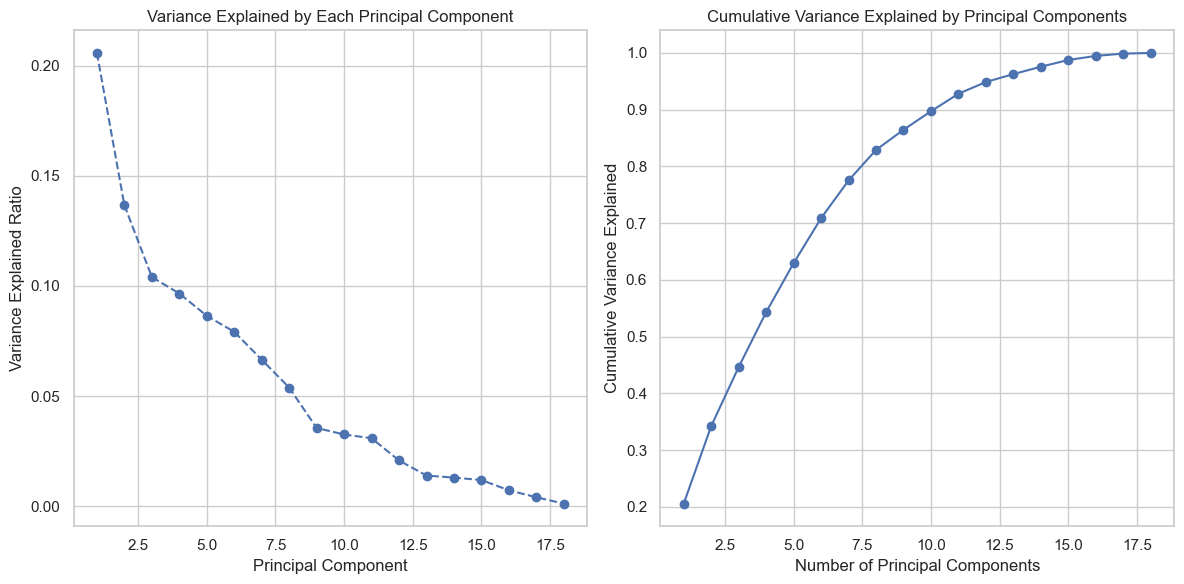

In [25]:
scaler = StandardScaler()
scaler.fit(df1)

df1_std = scaler.transform(df1)

pca = PCA()

pca.fit(df1_std)

# Plot variance explained by each principal component
plt.figure(figsize=(12, 6))

# Plot explained variance ratio of each principal component
plt.subplot(1, 2, 1)
x_values = np.arange(1, len(pca.explained_variance_ratio_) + 1)
plt.plot(x_values, pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)

# Plot cumulative variance explained
plt.subplot(1, 2, 2)
plt.plot(x_values, np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)

plt.tight_layout()
plt.show()

Elbows at 3(VAE: 45%) and 9(VAE:85%). Using 9 PCS.

In [26]:
X1 = pca.transform(df1_std)

n_components = 3
first_3_pcs = X1[:, :n_components]
print("Shape of first 2 principal components:", first_3_pcs.shape)

n_components = 9
first_9_pcs = X1[:, :n_components]
print("Shape of first 4 principal components:", first_9_pcs.shape)



Shape of first 2 principal components: (32, 3)
Shape of first 4 principal components: (32, 9)


## Combine pathological PCs with mutation PCs

In [27]:
m_10_pcs = df2.to_numpy()
m_10_pcs.shape

(32, 10)

In [28]:
X = np.concatenate((m_10_pcs, first_9_pcs), axis=1)
X.shape

(32, 19)

In [29]:
predictions_combined = evaluate_classification_models(X, y)

Logistic Regression - Accuracy: 53.12%, Recall: 60.0000%
Decision Tree - Accuracy: 65.62%, Recall: 70.0000%
Random Forest - Accuracy: 59.38%, Recall: 85.0000%
Support Vector Machine - Accuracy: 62.50%, Recall: 100.0000%
K-Nearest Neighbors - Accuracy: 53.12%, Recall: 80.0000%
Naive Bayes - Accuracy: 46.88%, Recall: 60.0000%


In [30]:
import json

In [31]:
print("Performance metrics for classification:")
print(f"Pathological data only (without PCA):")
pd.DataFrame(predictions_path_only)

Performance metrics for classification:
Pathological data only (without PCA):


,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine,K-Nearest Neighbors,Naive Bayes
Accuracy,0.6875,0.6875,0.75,0.5625,0.5625,0.5
Recall,0.8000,0.8000,0.85,0.8500,0.7500,0.5


In [32]:
print(f"Pathological(first 9 PCs) + Mutations(first 10 PCs):")
pd.DataFrame(predictions_combined)

Pathological(first 9 PCs) + Mutations(first 10 PCs):


,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine,K-Nearest Neighbors,Naive Bayes
Accuracy,0.53125,0.65625,0.59375,0.625,0.53125,0.46875
Recall,0.60000,0.70000,0.85000,1.000,0.80000,0.60000


In [33]:
X

array([[-4.78994608e+00,  9.83326912e-01, -6.38640404e-01,
        -7.54300296e-01, -5.62642765e+00, -1.66812778e+00,
        -9.73259091e-01,  1.42277288e+00,  3.70255065e+00,
        -1.76645026e-01, -1.85236187e+00, -1.36870370e-01,
        -2.86592050e+00, -6.25978350e-01, -1.71182062e+00,
        -6.67476903e-01,  1.57385268e+00, -1.40242910e+00,
        -9.09096586e-01],
       [ 8.82282555e-01, -4.78884888e+00, -4.03162003e+00,
        -7.05751848e+00,  3.73747826e+00, -2.23815775e+00,
         2.69699603e-01, -3.12936950e+00,  7.58464396e-01,
        -3.84638047e+00,  6.90899282e-01,  4.91443417e-01,
        -4.51422405e-01, -1.26704157e-01,  1.68187744e+00,
         2.99248042e-01, -1.28477941e+00,  5.48492451e-03,
        -2.03075624e-01],
       [ 2.38419414e+00, -7.97251511e+00, -3.78426266e+00,
        -4.37914562e+00, -1.99769527e-01, -4.45557880e+00,
        -7.39299440e+00, -1.61605573e+00,  3.99709988e+00,
         1.54937315e+00,  5.64115491e-02,  3.45075126e-01,
    